## **Some Important Series Methods**


1.   astype
2.   between
1.   clip
1.   drop_duplicates
2.   isnull
1.   dropna
2.   fillna
1.   isin
2.   apply
1.   copy
2.   plot














In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
vk = pd.read_csv('/content/kohli_ipl.csv',index_col='match_no',squeeze=True)
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [3]:
movies = pd.read_csv('/content/bollywood.csv',index_col='movie',squeeze=True)
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

#### **astype**:
- The `astype` method is used to change the data type of the elements in a Pandas Series. In your example, you used it to change the data type of the 'vk' Series from 'int64' to 'int16', which can reduce memory usage if you're dealing with large datasets.

In [4]:
# astype
import sys
sys.getsizeof(vk)

3456

In [5]:
vk.astype('int16')

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int16

In [6]:
sys.getsizeof(vk.astype('int16'))

2166

#### **between**:
- The `between` method is used to filter a Series to include only elements that fall within a specified range. In your example, you used it to filter the 'vk' Series to include only values between 51 and 99.

In [7]:
# between
vk.between(51,99)

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [8]:
# between
vk[vk.between(51,99)].size

43

**clip**:
- The `clip` method is used to limit the values in a Series to a specified range. It replaces values that are below the lower bound with the lower bound and values above the upper bound with the upper bound. This can be useful for handling outliers or ensuring data falls within a certain range.

In [9]:
# clip
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [10]:
vk.clip(50,80)

match_no
1      50
2      50
3      50
4      50
5      50
       ..
211    50
212    50
213    73
214    50
215    50
Name: runs, Length: 215, dtype: int64

#### **drop_duplicates**:
- The `drop_duplicates` method is used to remove duplicate values from a Series. It returns a new Series with only the unique values. In your example, you used it with the 'temp' Series to remove duplicate values.

In [11]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [12]:
temp.duplicated().sum()

4

In [13]:
temp.drop_duplicates()

0    1
2    2
4    3
6    4
dtype: int64

**isnull**:
- The `isnull` method is used to check for missing or NaN (Not-a-Number) values in a Series. It returns a Boolean Series where 'True' indicates missing values and 'False' indicates non-missing values. In your example, you used it to find missing values in the 'temp' Series.

In [14]:
# isnull
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [15]:
temp.isnull().sum()

3

**dropna**:
- The `dropna` method is used to remove missing values from a Series. It returns a new Series with the missing values removed. In your example, you used it to remove missing values from the 'temp' Series.

In [16]:
# dropna
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

**fillna**:
- The `fillna` method is used to fill missing values in a Series with specified values. It can be used to replace missing data with a specific value, such as the mean of the non-missing values. In your example, you filled missing values in the 'temp' Series with the mean of the non-missing values.

In [17]:
# fillna
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

#### **isin**:
- The `isin` method is used to filter a Series to include only elements that match a list of values. In your example, you used it to filter the 'vk' Series to include only values that match either 49 or 99.



In [18]:
# isin

vk[vk.isin([49,99])]

match_no
82    99
86    49
Name: runs, dtype: int64

#### **apply**:
- The `apply` method is used to apply a function to each element of a Series. In your example, you applied a lambda function to the 'movies' Series to extract the first word of each element and convert it to uppercase.


In [19]:
# apply
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [20]:
movies.apply(lambda x:x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

#### **copy**:
- The `copy` method is used to create a copy of a Series. This copy is separate from the original Series, and any modifications to the copy won't affect the original Series. In your example, you created a copy of the 'vk' Series using the 'copy' method and modified the copy without affecting the original Series.

In [21]:
# copy

vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [22]:
new = vk.head().copy()

In [23]:
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [24]:
new[1] = 100

In [25]:
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [26]:
vk.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

#### **plot**:
- The `plot` method is used to create visualizations of data in a Series. You can specify the type of plot (e.g., 'line', 'bar', 'pie') and customize various plot attributes. In your example, you used it to create a pie chart of the top 20 most common values in the 'movies' Series.

<Axes: ylabel='lead'>

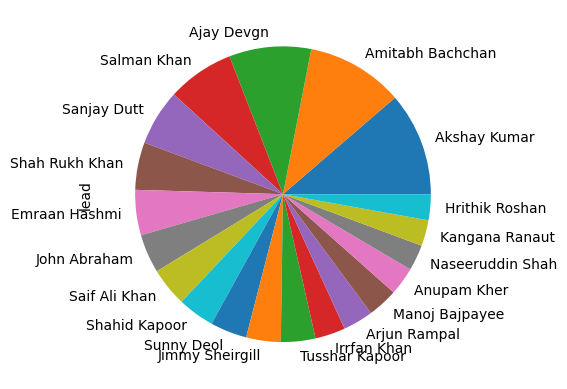

In [27]:
# plot
movies.value_counts().head(20).plot(kind='pie')